In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#model structure: https://github.com/opencv/opencv/raw/3.4.0/samples/dnn/face_detector/deploy.prototxt
#pre-trained weights: https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

detector = cv2.dnn.readNetFromCaffe("deploy.prototxt.txt", "res10_300x300_ssd_iter_140000.caffemodel")

In [3]:
detector.getLayerNames()

['data_bn',
 'data_scale',
 'conv1_h',
 'conv1_bn_h',
 'conv1_scale_h',
 'conv1_relu',
 'conv1_pool',
 'layer_64_1_conv1_h',
 'layer_64_1_bn2_h',
 'layer_64_1_scale2_h',
 'layer_64_1_relu2',
 'layer_64_1_conv2_h',
 'layer_64_1_sum',
 'layer_128_1_bn1_h',
 'layer_128_1_scale1_h',
 'layer_128_1_relu1',
 'layer_128_1_conv1_h',
 'layer_128_1_bn2',
 'layer_128_1_scale2',
 'layer_128_1_relu2',
 'layer_128_1_conv2',
 'layer_128_1_conv_expand_h',
 'layer_128_1_sum',
 'layer_256_1_bn1',
 'layer_256_1_scale1',
 'layer_256_1_relu1',
 'layer_256_1_conv1',
 'layer_256_1_bn2',
 'layer_256_1_scale2',
 'layer_256_1_relu2',
 'layer_256_1_conv2',
 'layer_256_1_conv_expand',
 'layer_256_1_sum',
 'layer_512_1_bn1',
 'layer_512_1_scale1',
 'layer_512_1_relu1',
 'layer_512_1_conv1_h',
 'layer_512_1_bn2_h',
 'layer_512_1_scale2_h',
 'layer_512_1_relu2',
 'layer_512_1_conv2_h',
 'layer_512_1_conv_expand_h',
 'layer_512_1_sum',
 'last_bn_h',
 'last_scale_h',
 'last_relu',
 'conv6_1_h',
 'conv6_1_relu',
 'conv6

In [4]:
image = cv2.imread("./images/image_test.jpg")
base_img = image.copy()

In [5]:
original_size = image.shape
target_size = (300, 300)
print("original image size: ", original_size)

original image size:  (720, 720, 3)


In [6]:
image = cv2.resize(image, target_size)

In [7]:
aspect_ratio_x = (original_size[1] / target_size[1])
aspect_ratio_y = (original_size[0] / target_size[0])
print("aspect ratios x: ",aspect_ratio_x,", y: ", aspect_ratio_y)

aspect ratios x:  2.4 , y:  2.4


In [8]:
image.shape

(300, 300, 3)

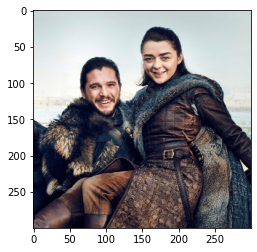

In [9]:
plt.imshow(image[:,:,::-1])

In [10]:
#detector expects (1, 3, 300, 300) shaped input
imageBlob = cv2.dnn.blobFromImage(image = image)
#imageBlob = np.expand_dims(np.rollaxis(image, 2, 0), axis = 0)

In [11]:
detector.setInput(imageBlob)
detections = detector.forward()

In [12]:
detections[0][0].shape

(200, 7)

In [13]:
detections_df = pd.DataFrame(detections[0][0]
    , columns = ["img_id", "is_face", "confidence", "left", "top", "right", "bottom"])

In [14]:
detections_df = detections_df[detections_df['is_face'] == 1] #0: background, 1: face
detections_df = detections_df[detections_df['confidence'] >= 0.90]

In [15]:
detections_df.head()

,img_id,is_face,confidence,left,top,right,bottom
0,0.0,1.0,0.99996,0.497030,0.138554,0.659241,0.338262
1,0.0,1.0,0.99457,0.239461,0.266330,0.395969,0.470287


Id  0
Confidence:  100.0 %


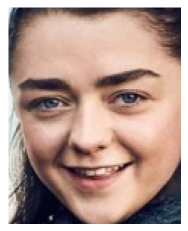

Id  1
Confidence:  99.46 %


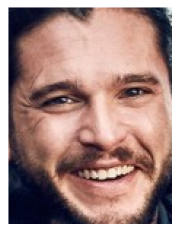

In [16]:
for i, instance in detections_df.iterrows():
    #print(instance)
    
    confidence_score = str(round(100*instance["confidence"], 2))+" %"
    
    left = int(instance["left"] * 300)
    bottom = int(instance["bottom"] * 300)
    right = int(instance["right"] * 300)
    top = int(instance["top"] * 300)
        
    #low resolution
    #detected_face = image[top:bottom, left:right]
    
    #high resolution
    detected_face = base_img[int(top*aspect_ratio_y):int(bottom*aspect_ratio_y), int(left*aspect_ratio_x):int(right*aspect_ratio_x)]
    
    if detected_face.shape[0] > 0 and detected_face.shape[1] > 0:
        
        #plt.figure(figsize = (3, 3))
        
        #low resolution
        #cv2.putText(image, confidence_score, (left, top-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
        #cv2.rectangle(image, (left, top), (right, bottom), (255, 255, 255), 1) #draw rectangle to main image
        
        #high resolution
        cv2.putText(base_img, confidence_score, (int(left*aspect_ratio_x), int(top*aspect_ratio_y-10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
        cv2.rectangle(base_img, (int(left*aspect_ratio_x), int(top*aspect_ratio_y)), (int(right*aspect_ratio_x), int(bottom*aspect_ratio_y)), (255, 255, 255), 1) #draw rectangle to main image
        
        #-------------------
        
        print("Id ",i)
        print("Confidence: ", confidence_score)
        #detected_face = cv2.resize(detected_face, (224, 224))
        plt.imshow(detected_face[:,:,::-1])
        plt.axis('off')
        plt.show()

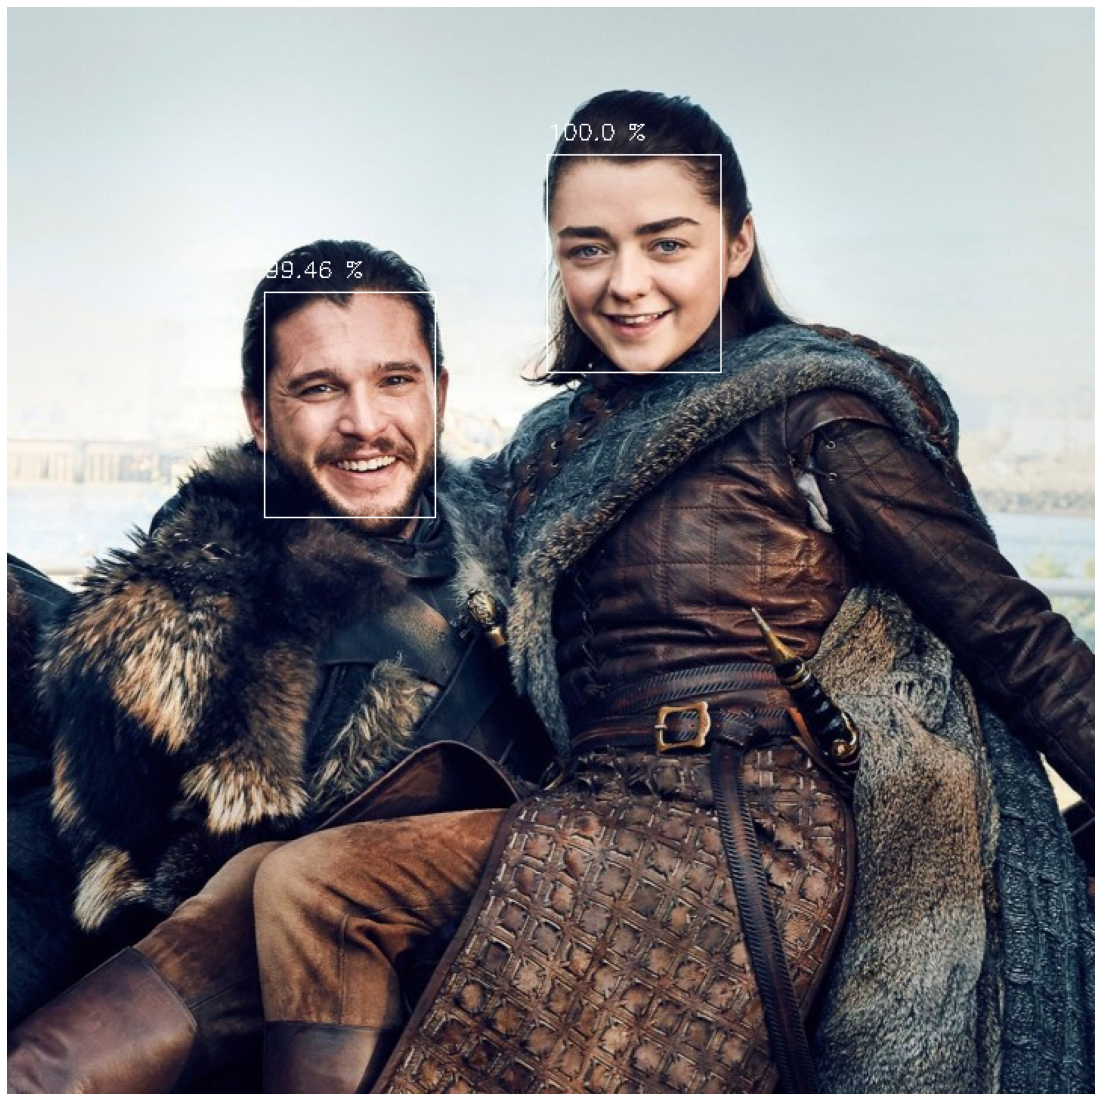

In [17]:
plt.figure(figsize = (20, 20))
#tmp_img = image.copy()
#tmp_img = cv2.resize(tmp_img, (600, 600))
plt.imshow(base_img[:,:,::-1])
plt.axis('off')
plt.show()